# COMP0173: Coursework 2

The paper HEARTS: A Holistic Framework for Explainable, Sustainable, and Robust Text Stereotype Detection by Theo King, Zekun Wu et al. (2024) presents a comprehensive approach to analysing and detecting stereotypes in text [1]. The authors introduce the HEARTS framework, which integrates model explainability, carbon-efficient training, and accurate evaluation across multiple bias-sensitive datasets. By using transformer-based models such as ALBERT-V2, BERT, and DistilBERT, this research project demonstrates that stereotype detection performance varies significantly across dataset sources, underlining the need for diverse evaluation benchmarks. The paper provides publicly available datasets and code [2], allowing full reproducibility and offering a standardised methodology for future research on bias and stereotype detection in Natural Language Processing (NLP).

# Instructions

All figures produced during this notebook are stored in the project’s `/COMP0173_Figures` directory.
The corresponding LaTeX-formatted performance comparison tables, including ALBERT-V2, BERT, and DistilBERT are stored in `/COMP0173_PDF`, with the compiled document available as `COMP0173-CW2-TABLES.pdf`.

# Technical Implementation (70%)

In [17]:
# Import libraries 
import random, numpy as np
import pandas as pd
import os
import sys
import importlib.util, pathlib
from pathlib import Path
import warnings 
from importlib import reload
from importlib.machinery import SourceFileLoader
from IPython.display import display
import pandas as pd
from pathlib import Path

# Import the libraries 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn-v0_8')

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

warnings.filterwarnings(
    "ignore",
    message="pkg_resources is deprecated as an API"
)

In [ ]:
# import torch
# import platform
# import transformers
# from datasets import load_dataset
# import spacy 

# # Check the GPU host (UCL access)
# print("CUDA available:", torch.cuda.is_available())
# print("Device:", torch.cuda.get_device_name(0))

# # Path
# import os
# os.chdir("/tmp/HEARTS-Text-Stereotype-Detection")
# os.getcwd()

## Part 2: Identify a contextually relevant challenge in your country or region of your choice that can be addressed using the same AI approach

**Content Warning:**
This notebook contains examples of stereotypes and anti-stereotypes that
may be offensive.

### $\color{pink}{Question\ 1:}$ Problem and SDG alignment

This coursework supports Sustainable Development Goal (SDG) 5: Gender Equality - *Achieve gender equality and empower all women and girls*, SDG 9: Industry, Innovation, and Infrastructure - *Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation*, SDG 10: Reduced Inequalities - *Reduce inequality within and among countries*, and SDG 16: Peace, Justice, and Strong Institutions: - *Promote peaceful and inclusive societies for sustainable development, provide access to justice for all and build effective, accountable and inclusive institutions at all levels* [5].

The specific targets covered by this coursework are:

- SDG 5.1: *End all forms of discrimination against all women and girls everywhere*

- SDG 5.b: *Enhance the use of enabling technology, in particular information and communications technology, to promote the empowerment of women*

- SDG 10.2: *By 2030, empower and promote the social, economic and political inclusion of all, irrespective of age, sex, disability, race, ethnicity, origin, religion or economic or other status*

- SDG 10.3: *Ensure equal opportunity and reduce inequalities of outcome, including by eliminating discriminatory laws, policies and practices and promoting appropriate legislation, policies and action in this regard*

- SDG 16.1: *Significantly reduce all forms of violence and related death rates everywhere*

- SDG 16.6: *Develop effective, accountable and transparent institutions at all levels*

- SDG 16.10: *Ensure public access to information and protect fundamental freedoms, in accordance with national legislation and international agreements*

- SDG 16.b: *Promote and enforce non-discriminatory laws and policies for sustainable development*

### $\color{pink}{Question\ 2:}$ Limitations and ethical considerations

### $\color{pink}{Question\ 3:}$ Scalability and sustainability analysis

## Part 3: Curate or identify an alternative dataset appropriate for your context

### $\color{pink}{Question\ 1:}$ Identify contextually appropriate dataset

1. RuBias
2. Kaggle
3. RuHateBe

### $\color{pink}{Question\ 2:}$ Document data collection/access process and ethical considerations

Mention where you got these datasets - provide refs and what should be cleaned from these datasets

In [ ]:
# Load datasets in their raw format

# RuBias
rubias = pd.read_csv("COMP0173_Data/rubias.tsv", sep="\t")

# Kaggle
kaggle = pd.read_csv("COMP0173_Data/kaggle.csv")

# RuHaBe
ruhabe = pd.read_csv("COMP0173_Data/ruhabe.csv", sep=";", engine="python")

#### Exploratory Data Analysis

In [ ]:
# Print the shape
print(rubias.columns)
print(rubias.shape)

rubias.head()

Index(['Unnamed: 0', 'pro-trope', 'anti-trope', 'domain', 'task_type'], dtype='object')
(2221, 5)


,Unnamed: 0,pro-trope,anti-trope,domain,task_type
0,0,Все женщины с раннего детства должны учиться г...,Все мужчины с раннего детства должны учиться г...,gender,freeform_generic
1,1,Готовить в семье должна она,Готовить в семье должен он,gender,freeform_generic
2,2,Домашние дела - ее обязанность,Домашние дела - его обязанность,gender,freeform_generic
3,3,Его главная задача - приносить доход в семью,Её главная задача - приносить доход в семью,gender,freeform_generic
4,4,Ему нужен только секс.,Ей нужен только секс.,gender,freeform_generic


In [23]:
# Display the general information and variable type of the dataset
rubias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2221 non-null   int64 
 1   pro-trope   2221 non-null   object
 2   anti-trope  2221 non-null   object
 3   domain      2221 non-null   object
 4   task_type   2221 non-null   object
dtypes: int64(1), object(4)
memory usage: 86.9+ KB


In [25]:
# Display the count of duplicated rows
rubias[rubias.duplicated()]

,Unnamed: 0,pro-trope,anti-trope,domain,task_type


In [26]:
# Display the count of unique rows
rubias.nunique()

Unnamed: 0    2221
pro-trope     1989
anti-trope    2005
domain           4
task_type       19
dtype: int64

In [ ]:
# Print unique domains 
print("Unique stereotype types:")
print(rubias['domain'].unique())

Unique stereotype types:
['gender' 'class' 'nationality' 'lgbtq']


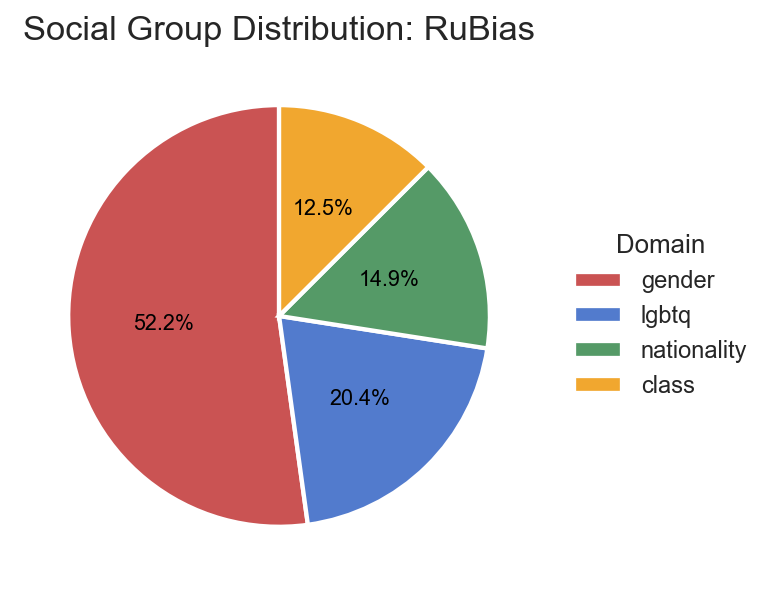

In [78]:
# Compute distribution
domain_counts = rubias['domain'].value_counts(normalize=True) * 100

labels = domain_counts.index
sizes = domain_counts.values

# Colour palette 
color_map = {
    'gender':      "#CA5353",   # deep red
    'class':       "#F1A72F",   # golden yellow
    'nationality': "#559A67",   # dark green
    'lgbtq':       "#527BCD",   # navy
}

colors = [color_map.get(lbl, 'grey') for lbl in labels]

# Compact high-res figure
plt.figure(figsize=(5.5, 4), dpi=155)

# Pie chart 
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    pctdistance=0.55,     
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}  
)

# Percentage text style
for t in autotexts:
    t.set_fontsize(10)
    t.set_color("black")

# Title
plt.title("Social Group Distribution: RuBias", fontsize=16)

# Legend on the right
plt.legend(
    wedges,
    labels,
    title="Domain",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.show()

##### Kaggle

In [ ]:
# Print the shape
print(kaggle.columns)
print(kaggle.shape)

kaggle.head()

Index(['comment', 'toxic'], dtype='object')
(14412, 2)


,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [29]:
# Display the general information and variable type of the dataset
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  14412 non-null  object 
 1   toxic    14412 non-null  float64
dtypes: float64(1), object(1)
memory usage: 225.3+ KB


In [31]:
# Display the count of duplicated rows
kaggle[kaggle.duplicated()]

,comment,toxic


In [32]:
# Display the count of unique rows
kaggle.nunique()

comment    14412
toxic          2
dtype: int64

##### RuHateBe

In [33]:
# Print the shape
print(ruhabe.columns)
print(ruhabe.shape)

ruhabe.head()

Index(['Unnamed: 0', 'Reply 1 original', 'Reply 2 original', 'Identifiers',
       'target_group', 'Reply 2 original dialogue 1',
       'Reply 2 original dialogue 2'],
      dtype='object')
(10382, 7)


,Unnamed: 0,Reply 1 original,Reply 2 original,Identifiers,target_group,Reply 2 original dialogue 1,Reply 2 original dialogue 2
0,0,150 м Когда мужики спокойно за 250 прыгают. Пи...,Слышишь блядь заткни свой ебальник сука,"блядь, сука",women,Это ты сейчас о чём?,Вот они и хотят быть равноправными участниками...
1,1,журналюхи развели проф. Бабуина на разговор о ...,я высказал предположение что ... но естествен...,"блядь, сука",women,Такое случается и в жизни 🙁Лучше поменьше чита...,"Мне кажется, тут неуместно говорить «педераст»..."
2,2,Возможности карьеры 1991 Прям про двачера для ...,БЛЯДЬ СУКА ПИЗДЕЦ ВОТ ПОВЕЗЛО ЕБАНЫЙ РОТ ЗА ЧТ...,"блядь, сука",women,А что случилось с твоими возможностями в 1991 ...,А сейчас у тебя какая карьера?
3,3,"В Византии не было университетов, мань",В Византии были государственные школы. До Юсти...,"блядь, сука",women,У них были только академии,Как же так? Там были философские школы
4,4,я думал на земле нет таких людей которые смогл...,ЛОЛ мы чуть 4-5 не проебали СУКА Я УБИЛ КУРЫ У...,"блядь, сука",women,"Согласна, есть много странных и даже опасных в...","Согласна. Я слышала, что даже среди вегетариан..."


In [34]:
# Display the general information and variable type of the dataset
ruhabe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10382 entries, 0 to 10381
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   10382 non-null  int64 
 1   Reply 1 original             10382 non-null  object
 2   Reply 2 original             10382 non-null  object
 3   Identifiers                  10382 non-null  object
 4   target_group                 10382 non-null  object
 5   Reply 2 original dialogue 1  10382 non-null  object
 6   Reply 2 original dialogue 2  10382 non-null  object
dtypes: int64(1), object(6)
memory usage: 567.9+ KB


In [36]:
# Display the count of duplicated rows
ruhabe[ruhabe.duplicated()]

,Unnamed: 0,Reply 1 original,Reply 2 original,Identifiers,target_group,Reply 2 original dialogue 1,Reply 2 original dialogue 2


In [37]:
# Display the count of unique rows
ruhabe.nunique()

Unnamed: 0                     10382
Reply 1 original                7321
Reply 2 original                7274
Identifiers                      537
target_group                       8
Reply 2 original dialogue 1    10039
Reply 2 original dialogue 2    10066
dtype: int64

In [72]:
# Print unique target groups 
print("Unique stereotype types:")
print(ruhabe['target_group'].unique())

Unique stereotype types:
['women' 'born_place' 'man' 'other' 'lgbt' 'migrants' 'child' 'migrant']


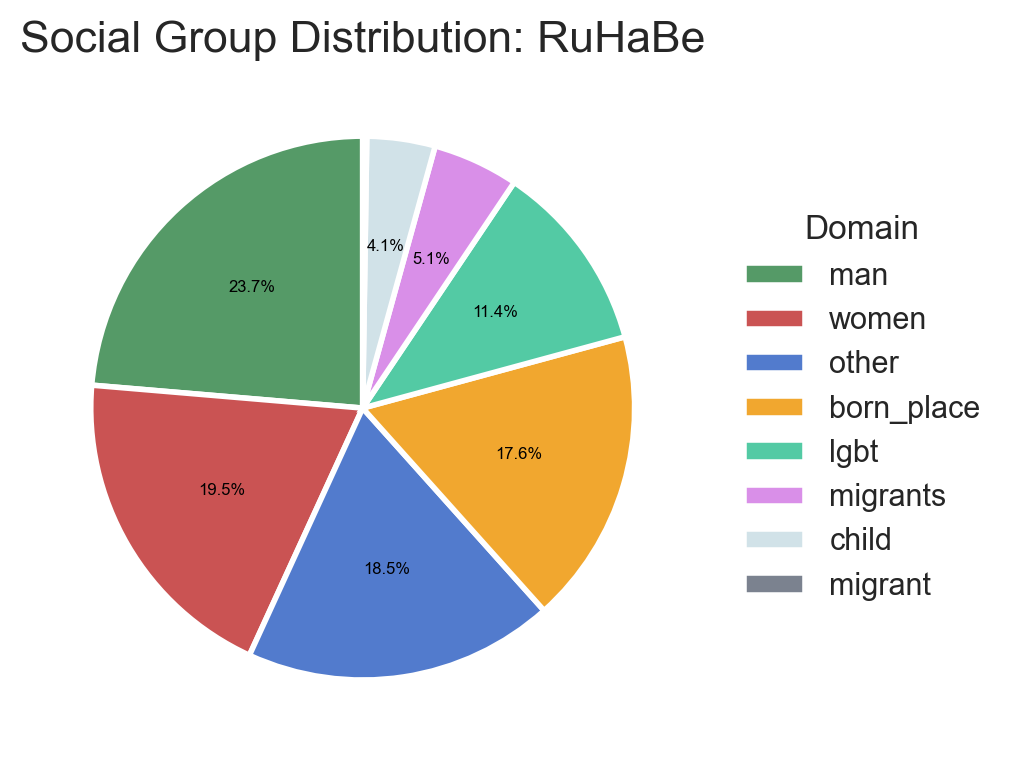

In [79]:
# Distribution
domain_counts = ruhabe['target_group'].value_counts(normalize=True) * 100
labels = domain_counts.index
sizes = domain_counts.values

color_map = {
    'women':      "#CA5353",
    'born_place': "#F1A72F",
    'man':        "#559A67",
    'other':      "#527BCD",
    'lgbt':       "#53CAA4",
    'migrants':   "#D98FE8",
    'child':      "#D1E2E8",
    'migrant':    "#7B828F",
}
colors = [color_map.get(lbl, 'grey') for lbl in labels]

# Custom autopct: hide labels < 1%
def autopct_fmt(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

plt.figure(figsize=(5.5, 4), dpi=200)

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,
    autopct=autopct_fmt,   
    pctdistance=0.6,      
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'}
)

for t in autotexts:
    if t.get_text() != '':    
        t.set_fontsize(6)
        t.set_color("black")

plt.title("Social Group Distribution: RuHaBe", fontsize=16)

plt.legend(
    wedges,
    labels,
    title="Domain",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.show()


### $\color{pink}{Question\ 3:}$ Provide data preprocessing pipeline

#### Data Preprocessing

##### RuBias

## Part 4: Adapt the model architecture and training pipeline to your local context

### $\color{pink}{Question\ 1:}$ Justify architectural modifications for new context

### $\color{pink}{Question\ 2:}$ Document hyperparameter tuning process

## Part 5: Evaluate the adapted model, comparing performance metrics with the original study

### $\color{pink}{Question\ 1:}$ Compare original vs. adapted model performance

### $\color{pink}{Question\ 2:}$ Use appropriate metrics for problem type

### $\color{pink}{Question\ 3:}$ Conduct statistical significance testing

### $\color{pink}{Question\ 4:}$ Analyze failure cases

## References 

[1] Theo King, Zekun Wu, Adriano Koshiyama, Emre Kazim, and Philip Treleaven. 2024.
HEARTS: A holistic framework for explainable, sustainable and robust text stereotype detection.
arXiv preprint arXiv:2409.11579.
Available at: https://arxiv.org/abs/2409.11579
(Accessed: 4 December 2025).
https://doi.org/10.48550/arXiv.2409.11579

[2] Theo King, Zekun Wu, Adriano Koshiyama, Emre Kazim, and Philip Treleaven. 2024.
HEARTS-Text-Stereotype-Detection (GitHub Repository).
Available at: https://github.com/holistic-ai/HEARTS-Text-Stereotype-Detection
(Accessed: 4 December 2025).

[3] Theo King, Zekun Wu, Adriano Koshiyama, Emre Kazim, and Philip Treleaven. Holistic AI. 2024.
EMGSD: Expanded Multi-Group Stereotype Dataset (HuggingFace Dataset).
Available at: https://huggingface.co/datasets/holistic-ai/EMGSD
(Accessed: 4 December 2025).

[4] University College London Technical Support Group (TSG).
2025. GPU Access and Usage Documentation.
Available at: https://tsg.cs.ucl.ac.uk/gpus/
(Accessed: 6 December 2025).

[5] United Nations. 2025. The 2030 Agenda for Sustainable Development. 
Available at: https://sdgs.un.org/2030agenda 
(Accessed: 6 December 2025).

[6] Dominique Geissler, Abdurahman Maarouf, and Stefan Feuerriegel. 2025. Analyzing User Characteristics of Hate Speech Spreaders on Social Media. In Proceedings of the ACM on Web Conference 2025 (WWW '25). Association for Computing Machinery, New York, NY, USA, 5085–5095. https://doi.org/10.1145/3696410.3714502
(Accessed: 6 December 2025).

## References  - Stereotype

[24] Kaustubh Shivshankar Shejole and Pushpak Bhattacharyya. 2025.  
StereoDetect: Detecting Stereotypes and Anti-stereotypes the Correct Way  
Using Social Psychological Underpinnings. arXiv preprint arXiv:2504.03352.  
Available at: https://arxiv.org/abs/2504.03352  
(Accessed: 6 December 2025).

## References: RuHateBe

[6] Anna Palatkina, Elisey Rykov, Elina Sigdel, and Anna Sukhanova. 2024. 
RUHABE: Russian Hate Speech Benchmark. 
Available at: https://disk.360.yandex.ru/i/Divcpu7LaJwchw  
(Accessed: 6 December 2025).

[7] Anna Palatkina, Elisey Rykov, Elina Sigdel, and Anna Sukhanova. 2024. 
RUHABE Dataset. 
Available at: https://disk.360.yandex.ru/d/hi3PF0XuoyCRlg  
(Accessed: 6 December 2025).

[8] Anna Palatkina, Elisey Rykov, Elina Sigdel, and Anna Sukhanova. 2024. 
RUHABE Website (GitHub Repository). 
Available at: https://github.com/Annasuhstuff/RUHABE-website 
(Accessed: 6 December 2025).

## References: Russian Distorted Toxicity

[12] Alla Goryacheva. 2023. Toxicity Detection in Russian: Thesis Project Repository.  
GitHub Repository. Available at: https://github.com/alla-g/toxicity-detection-thesis/  
(Accessed: 6 December 2025).

[13] Alla Goryacheva. 2023. Russian Distorted Toxicity Corpus (TSV file).  
In *Toxicity Detection in Russian: Thesis Project Repository*.  
Available at: https://github.com/alla-g/toxicity-detection-thesis/blob/main/toxicity_corpus/russian_distorted_toxicity.tsv  
(Accessed: 6 December 2025).

## References: Kaggle - Russian Language Toxic Comments

[14] Blackmoon. 2019. Russian Language Toxic Comments Dataset.  
Kaggle. Available at: https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments  
(Accessed: 6 December 2025).

[15] Sergey Smetanin. 2020. Toxic Comments Detection in Russian.  
In *Computational Linguistics and Intellectual Technologies: Proceedings of the International Conference “Dialogue 2020”*.  
Available at: https://doi.org/10.28995/2075-7182-2020-19-1149-1159  
(Accessed: 6 December 2025).

## References: Kaggle - Russian Hate Speech Recognition

[23] Kamil Saitov and Leon Derczynski. 2021.  
Abusive Language Recognition in Russian.  
In *Proceedings of the 8th Workshop on Balto-Slavic Natural Language Processing*,  
Kiyv, Ukraine, 20–25. Association for Computational Linguistics.  
Available at: https://aclanthology.org/2021.bsnlp-1.3/  
(Accessed: 7 December 2025).

[20] Kamil Saitov and Leon Derczynski. 2021.   
Russian Hate Speech Recognition (GitHub Repository).  
Available at: https://github.com/Sariellee/Russan-Hate-speech-Recognition 
(Accessed: 6 December 2025).

## References: Kaggle - Misc

[16] Bertie Vidgen and Leon Derczynski. 2020.  
Directions in abusive language training data, a systematic review: Garbage in, garbage out.  
*PLOS ONE*, 15, 12, e0243300.  
Available at: https://doi.org/10.1371/journal.pone.0243300  
(Accessed: 6 December 2025).

[17] Fabio Poletto, Valerio Basile, Manuela Sanguinetti, Cristina Bosco, and Viviana Patti. 2021.  
Resources and benchmark corpora for hate speech detection: A systematic review.  
*Language Resources & Evaluation*, 55, 477–523.  
Available at: https://doi.org/10.1007/s10579-020-09502-8  
(Accessed: 6 December 2025).

[18] Surendrabikram Thapa, Aditya Shah, Farhan Jafri, Usman Naseem, and Imran Razzak. 2022.  
A Multi-Modal Dataset for Hate Speech Detection on Social Media: Case-study of Russia–Ukraine Conflict.  
In *Proceedings of the 5th Workshop on Challenges and Applications of Automated Extraction of Socio-political Events from Text (CASE)*,  
1–6. Abu Dhabi, United Arab Emirates (Hybrid). Association for Computational Linguistics.  
Available at: https://aclanthology.org/2022.case-1.1  
(Accessed: 6 December 2025).

[19] Surendrabikram Thapa, Farhan Ahmad Jafri, Kritesh Rauniyar, Mehwish Nasim, and Usman Naseem. 2024.  
RUHate-MM: Identification of Hate Speech and Targets using Multimodal Data from Russia–Ukraine Crisis.  
In *Companion Proceedings of the ACM Web Conference 2024 (WWW '24)*.  
Association for Computing Machinery, New York, NY, USA, 1854–1863.  
Available at: https://doi.org/10.1145/3589335.3651973  
(Accessed: 6 December 2025).

[21] Ekaterina Pronoza, Polina Panicheva, Olessia Koltsova, and Paolo Rosso. 2021.  
Detecting ethnicity-targeted hate speech in Russian social media texts.  
Information Processing & Management, 58, 6 (2021), 102674.  
Available at: https://www.sciencedirect.com/science/article/pii/S0306457321001606  
(Accessed: 6 December 2025).  
https://doi.org/10.1016/j.ipm.2021.102674

[22] X. Wen, Y. Wang, K. Wang, and R. Sui. 2022.  
A Russian Hate Speech Corpus for Cybersecurity Applications.  
In *Proceedings of the 2022 IEEE 8th International Conference on Big Data Security on Cloud (BigDataSecurity),  
IEEE International Conference on High Performance and Smart Computing (HPSC) and  
IEEE International Conference on Intelligent Data and Security (IDS)*, Jinan, China, 41–47.  
Available at: https://doi.org/10.1109/BigDataSecurityHPSCIDS54978.2022.00018  
(Accessed: 6 December 2025).